<a href="https://colab.research.google.com/github/Olivier520100/EcoCompute_HackHarvard_2024/blob/main/DataAnalysis/wind_vs_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [212]:
hamburg = pd.read_excel("hamburg.xlsx")
hamburg = hamburg.drop(columns=["description", "stations", "name"])
hamburg = hamburg.rename(columns={"datetime": "date"})
hamburg.head()

,date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,icon
0,2020-01-01,3.3,-2.5,0.0,1.8,-5.6,-2.2,-0.8,94.6,0.000,...,3.9,16.5,1.4,1.0,NaN,2020-01-01T08:36:35,2020-01-01T16:10:19,0.20,Partially cloudy,partly-cloudy-day
1,2020-01-02,3.5,-1.9,-0.5,-0.8,-6.6,-4.9,-1.3,94.5,0.000,...,3.7,13.6,1.0,1.0,NaN,2020-01-02T08:36:25,2020-01-02T16:11:26,0.23,Partially cloudy,partly-cloudy-day
2,2020-01-03,8.3,3.8,6.0,6.1,-1.2,2.2,4.6,91.2,6.486,...,11.9,6.3,0.5,0.0,NaN,2020-01-03T08:36:12,2020-01-03T16:12:36,0.25,"Rain, Overcast",rain
3,2020-01-04,7.2,2.5,4.7,2.4,-0.3,0.9,2.0,82.3,3.916,...,21.6,8.9,0.8,1.0,NaN,2020-01-04T08:35:55,2020-01-04T16:13:49,0.30,"Rain, Partially cloudy",rain
4,2020-01-05,5.9,1.0,3.9,3.4,-1.5,1.1,1.6,85.4,0.000,...,19.0,13.3,1.2,1.0,NaN,2020-01-05T08:35:35,2020-01-05T16:15:05,0.33,Partially cloudy,partly-cloudy-day


In [213]:
wind = pd.read_csv("wind_europe_data.csv")
wind = wind[wind['countryName'] == 'Germany']
wind = wind.drop("countryName", axis=1)
wind.head()

,date,generation,priceEuroPerMwh
8912,2021-03-01,9.578518e+10,49.840833
8913,2021-03-02,9.214241e+10,53.549167
8914,2021-03-03,1.560190e+11,52.019583
8915,2021-03-04,2.432049e+11,53.971667
8916,2021-03-05,1.820682e+11,53.702083


### Note
This is an approximation. Most of germany's wind electric generating stations are near Hamburg.
As such, we'll just assume that germany's whole power generation is at Hamburg!

In [214]:
hamburg['date'] = pd.to_datetime(hamburg['date'])
wind['date'] = pd.to_datetime(wind['date'])

In [215]:
df = pd.merge(hamburg, wind, on='date', how='inner')
df.head()

,date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,icon,generation,priceEuroPerMwh
0,2021-03-01,7.8,0.2,3.9,6.3,0.2,2.8,2.4,90.4,0.0,...,6.4,4.0,NaN,2021-03-01T07:07:36,2021-03-01T17:58:01,0.57,Partially cloudy,partly-cloudy-day,9.578518e+10,49.840833
1,2021-03-02,11.4,-2.2,3.4,11.4,-2.2,2.9,0.5,83.4,0.0,...,7.9,4.0,NaN,2021-03-02T07:05:17,2021-03-02T17:59:56,0.61,Clear,clear-day,9.214241e+10,53.549167
2,2021-03-03,13.7,-1.2,5.0,13.7,-4.0,3.2,2.1,83.9,0.0,...,7.9,4.0,NaN,2021-03-03T07:02:57,2021-03-03T18:01:51,0.65,Partially cloudy,partly-cloudy-day,1.560190e+11,52.019583
3,2021-03-04,5.8,-0.3,3.3,3.6,-3.2,-0.2,0.6,82.9,0.0,...,2.8,2.0,NaN,2021-03-04T07:00:37,2021-03-04T18:03:46,0.68,Partially cloudy,partly-cloudy-day,2.432049e+11,53.971667
4,2021-03-05,6.4,-4.0,0.9,3.4,-6.8,-1.6,-4.6,69.4,0.0,...,9.5,5.0,NaN,2021-03-05T06:58:16,2021-03-05T18:05:40,0.72,Clear,clear-day,1.820682e+11,53.702083


In [216]:
df = df.drop(columns=["conditions", "icon"])
df['sunrise'] = pd.to_datetime(df['sunrise']).dt.time
df['sunset'] = pd.to_datetime(df['sunset']).dt.time
df.head()

,date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,generation,priceEuroPerMwh
0,2021-03-01,7.8,0.2,3.9,6.3,0.2,2.8,2.4,90.4,0.0,...,10.1,74.8,6.4,4.0,NaN,07:07:36,17:58:01,0.57,9.578518e+10,49.840833
1,2021-03-02,11.4,-2.2,3.4,11.4,-2.2,2.9,0.5,83.4,0.0,...,10.5,91.3,7.9,4.0,NaN,07:05:17,17:59:56,0.61,9.214241e+10,53.549167
2,2021-03-03,13.7,-1.2,5.0,13.7,-4.0,3.2,2.1,83.9,0.0,...,9.1,90.7,7.9,4.0,NaN,07:02:57,18:01:51,0.65,1.560190e+11,52.019583
3,2021-03-04,5.8,-0.3,3.3,3.6,-3.2,-0.2,0.6,82.9,0.0,...,24.4,31.4,2.8,2.0,NaN,07:00:37,18:03:46,0.68,2.432049e+11,53.971667
4,2021-03-05,6.4,-4.0,0.9,3.4,-6.8,-1.6,-4.6,69.4,0.0,...,38.2,110.5,9.5,5.0,NaN,06:58:16,18:05:40,0.72,1.820682e+11,53.702083


In [217]:
# prompt: count which columns have the highest NaN values

nan_counts = df.isna().sum()
nan_counts = nan_counts.sort_values(ascending=False)
print(nan_counts)


preciptype          333
severerisk          315
date                  0
windspeed             0
generation            0
moonphase             0
sunset                0
sunrise               0
uvindex               0
solarenergy           0
solarradiation        0
visibility            0
cloudcover            0
sealevelpressure      0
winddir               0
windgust              0
tempmax               0
snowdepth             0
snow                  0
precipcover           0
precipprob            0
precip                0
humidity              0
dew                   0
feelslike             0
feelslikemin          0
feelslikemax          0
temp                  0
tempmin               0
priceEuroPerMwh       0
dtype: int64


In [218]:
df = df.drop(columns=["preciptype", "severerisk"])
df.head()

,date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,generation,priceEuroPerMwh
0,2021-03-01,7.8,0.2,3.9,6.3,0.2,2.8,2.4,90.4,0.0,...,75.1,10.1,74.8,6.4,4.0,07:07:36,17:58:01,0.57,9.578518e+10,49.840833
1,2021-03-02,11.4,-2.2,3.4,11.4,-2.2,2.9,0.5,83.4,0.0,...,17.2,10.5,91.3,7.9,4.0,07:05:17,17:59:56,0.61,9.214241e+10,53.549167
2,2021-03-03,13.7,-1.2,5.0,13.7,-4.0,3.2,2.1,83.9,0.0,...,22.9,9.1,90.7,7.9,4.0,07:02:57,18:01:51,0.65,1.560190e+11,52.019583
3,2021-03-04,5.8,-0.3,3.3,3.6,-3.2,-0.2,0.6,82.9,0.0,...,83.1,24.4,31.4,2.8,2.0,07:00:37,18:03:46,0.68,2.432049e+11,53.971667
4,2021-03-05,6.4,-4.0,0.9,3.4,-6.8,-1.6,-4.6,69.4,0.0,...,2.9,38.2,110.5,9.5,5.0,06:58:16,18:05:40,0.72,1.820682e+11,53.702083


In [219]:
# prompt: check for string datatypes in the table

for column in df.columns:
  if df[column].dtype == object:
    print(f"Column '{column}' has string data type.")


Column 'sunrise' has string data type.
Column 'sunset' has string data type.


In [220]:
df['sunrise'] = pd.to_datetime(df['sunrise'], format='%H:%M:%S').dt.hour
df['sunset'] = pd.to_datetime(df['sunset'], format='%H:%M:%S').dt.hour

In [221]:
# prompt: check for string datatypes in the table

for column in df.columns:
  if df[column].dtype == object:
    print(f"Column '{column}' has string data type.")

In [222]:
df.columns

Index(['date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase',
       'generation', 'priceEuroPerMwh'],
      dtype='object')

In [223]:
# prompt: do test train split and normalization on df but for prophet model

from sklearn.model_selection import train_test_split

# Assuming 'date' is your datetime column and 'consumption' is the target variable
df_prophet = df[['date', 'generation', 'windspeed']]
df_prophet = df_prophet.rename(columns={'date': 'ds', 'generation': 'y'})

# Split data into training and testing sets
train_df, test_df = train_test_split(df_prophet, test_size=0.2, shuffle=False)

# Prophet doesn't require explicit normalization, as it handles time series data internally
# You can optionally perform scaling if needed for other models alongside Prophet.

print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)


Training data shape: (891, 3)
Testing data shape: (223, 3)


In [224]:
ai_df = df[["date", "generation", "windspeed"]]
ai_df['date'] = pd.to_datetime(ai_df['date']).dt.month
ai_df.head()

<ipython-input-224-2ab97f3d0ba3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_df['date'] = pd.to_datetime(ai_df['date']).dt.month


,date,generation,windspeed
0,3,9.578518e+10,10.1
1,3,9.214241e+10,10.7
2,3,1.560190e+11,23.3
3,3,2.432049e+11,22.1
4,3,1.820682e+11,16.9


In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = ai_df[['windspeed']]  # Independent variable (wind speed)
y = ai_df[['generation']]  # Dependent variable (generation)

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
from sklearn.linear_model import LinearRegression
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

(223, 1)
Mean Squared Error (MSE): 0.42900704153533237
Mean Absolute Error (MAE): 0.5273151841114


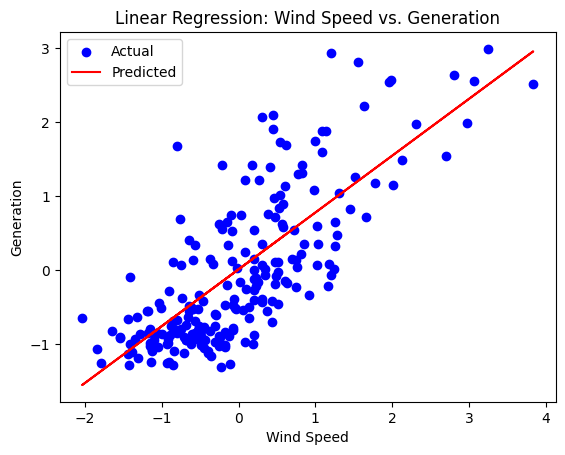

Intercept: [0.01234582]
Coefficient: [0.76866288]


In [231]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred.shape)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Wind Speed')
plt.ylabel('Generation')
plt.title('Linear Regression: Wind Speed vs. Generation')
plt.legend()
plt.show()

# Print the model's coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

In [232]:
y_pred.shape

(223, 1)

Predicted values in original scale: [[ 1.32314594e+11]
 [ 1.84030289e+11]
 [ 6.14210846e+11]
 [ 5.13130169e+11]
 [ 2.73357399e+11]
 [ 5.20182309e+11]
 [ 1.15859600e+11]
 [ 1.98134570e+11]
 [ 3.48580229e+11]
 [ 2.07537424e+11]
 [ 5.22533022e+11]
 [ 4.00295924e+11]
 [ 7.41149371e+11]
 [ 2.07537424e+11]
 [ 4.28504485e+11]
 [ 2.45148838e+11]
 [ 4.80220181e+11]
 [ 3.48580229e+11]
 [ 2.21641704e+11]
 [ 3.34475948e+11]
 [ 1.93433143e+11]
 [ 3.03916674e+11]
 [ 3.06267387e+11]
 [ 2.68655973e+11]
 [ 8.76510388e+10]
 [ 3.74438077e+11]
 [ 3.69736650e+11]
 [ 4.02646638e+11]
 [ 2.68655973e+11]
 [ 2.26343131e+11]
 [ 4.07348065e+11]
 [ 2.31044558e+11]
 [ 5.22533022e+11]
 [ 4.96675175e+11]
 [ 6.41439046e+10]
 [ 6.82381535e+11]
 [ 1.62873868e+11]
 [ 8.53003254e+10]
 [ 3.88542357e+11]
 [ 6.09509419e+11]
 [ 4.37907339e+11]
 [ 3.55632369e+11]
 [ 1.34665307e+11]
 [ 1.81679576e+11]
 [ 8.09320060e+11]
 [ 4.75518754e+11]
 [ 2.05186710e+11]
 [ 4.75518754e+11]
 [ 2.42798125e+11]
 [ 1.46418874e+11]
 [ 2.16940277e

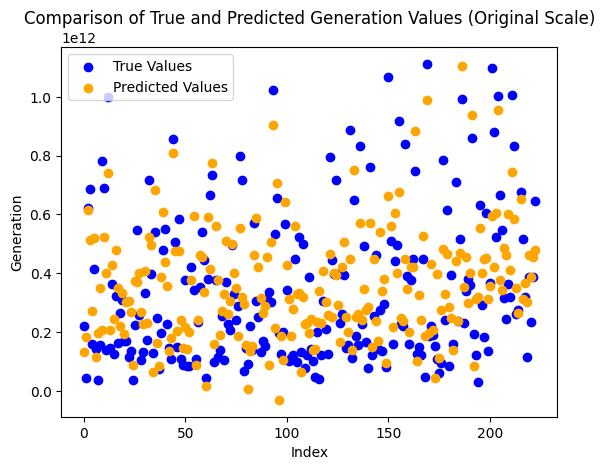

In [233]:
# prompt: now predict actual values by reversing standard scaling

import matplotlib.pyplot as plt
import numpy as np
# Assuming you have your scaler defined as 'scaler'
y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Print the predicted values in the original scale
print("Predicted values in original scale:", y_pred_original_scale)

# Example: Convert y_test to original scale as well
y_test_original_scale = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

# Create scatter plot
plt.scatter(range(len(y_test_original_scale)), y_test_original_scale, label="True Values", color='blue')
plt.scatter(range(len(y_pred_original_scale)), y_pred_original_scale, label="Predicted Values", color='orange')

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Generation")
plt.title("Comparison of True and Predicted Generation Values (Original Scale)")

# Show legend
plt.legend()

# Show plot
plt.show()